In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Survived','Fare'])
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

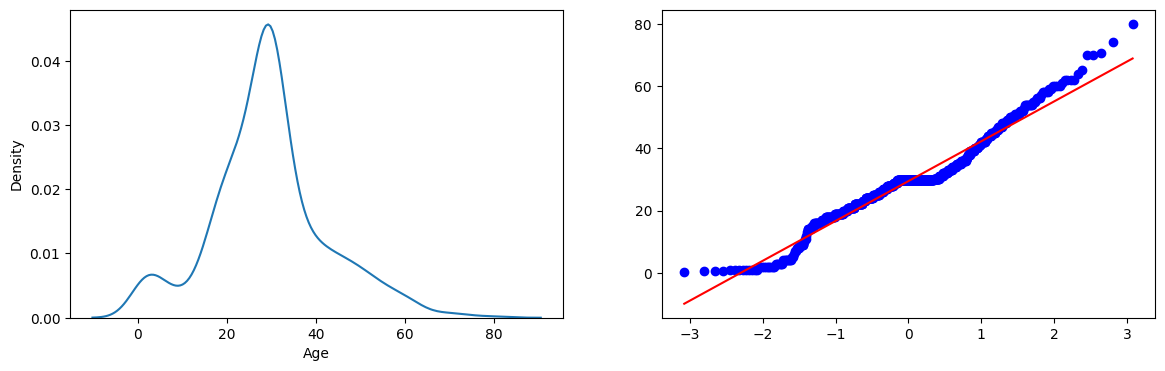

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'],)
# plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title=('Age QQ Plot')

plt.show()

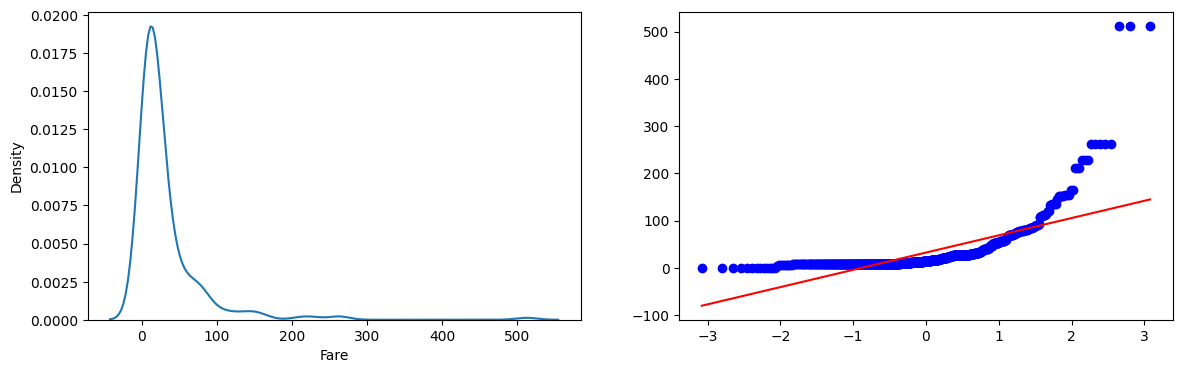

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'],)
# plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title=('Age QQ Plot')

plt.show()

In [24]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf1.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6636771300448431
Accuracy DT 0.6905829596412556


In [35]:
trf=FunctionTransformer(func=np.log1p)

In [36]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [37]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf1.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6816143497757847
Accuracy DT 0.695067264573991


In [38]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf1=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6611111111111111
